In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv('churn_train.csv')
test_df = pd.read_csv('churn_test.csv')

In [4]:
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1768-ZAIFU,Female,1,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.20,25.2,Yes
1,2159-TURXX,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.05,95.55,No
2,8261-GWDBQ,Female,1,Yes,No,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.05,6925.9,No
3,2732-ISEZX,Female,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.50,104.3,No
4,7607-QKKTJ,Male,0,Yes,Yes,45,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,One year,Yes,Credit card (automatic),95.00,4368.85,No


In [5]:
test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9505-SQFSW,Female,0,Yes,Yes,3,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,40.30,92.5,No
1,1723-HKXJQ,Male,0,No,No,42,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.75,4273.45,Yes
2,9154-QDGTH,Male,0,Yes,Yes,43,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),104.30,4451.85,No
3,8309-IEYJD,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.60,70.6,No
4,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes


In [6]:
for column in train_df.columns:
    print(f"--- {column} ---")
    print("Unique values:", train_df[column].unique())
    print("Type of values:", train_df[column].dtype)


--- customerID ---
Unique values: ['1768-ZAIFU' '2159-TURXX' '8261-GWDBQ' ... '2796-NNUFI' '3521-SYVOR'
 '5453-AXEPF']
Type of values: object
--- gender ---
Unique values: ['Female' 'Male']
Type of values: object
--- SeniorCitizen ---
Unique values: [1 0]
Type of values: int64
--- Partner ---
Unique values: ['No' 'Yes']
Type of values: object
--- Dependents ---
Unique values: ['No' 'Yes']
Type of values: object
--- tenure ---
Unique values: [ 1  5 60 45 57 26 72  3 55 66  8  2  4 58 63 68 29 30 67 69 65  7 56  6
 46 32 48 35 31 71 39 22 70 15 12 13 64 20 11 38 52 53 17 62 19 25 10 24
 16 47 44 23 50 51 54 21 28 37 49 27 61 40 41 33 34  9 18 14 42 36 43 59
  0]
Type of values: int64
--- PhoneService ---
Unique values: ['No' 'Yes']
Type of values: object
--- MultipleLines ---
Unique values: ['No phone service' 'No' 'Yes']
Type of values: object
--- InternetService ---
Unique values: ['DSL' 'No' 'Fiber optic']
Type of values: object
--- OnlineSecurity ---
Unique values: ['No' 'No internet

In [7]:
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')
test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')

# Förbered datan för att kunna användas av modellen

# Finns det data som ej borde användas?

 Jag väljer att ta bort customerID då de inte kommer ge något till modellen.

In [8]:
train_df = train_df.drop('customerID', axis=1)
test_df = test_df.drop('customerID', axis=1)

# Det finns en hel del textdata som måste behandlas på något vis (finns flera olika alternativ, där vissa metoder är mer lämpade för neurala nätverk)

Jag har valt att använda OneHotEncoder för att hantera kategorisk textdata. Denna teknik omvandlar varje kategori till en binär form och undviker att modellen felaktigt tolkar kategorier som ordnade (som kan hända om man tilldelar varje kategori ett heltal). På så sätt behandlas varje kategori som unik och oberoende.

In [9]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

onehot = OneHotEncoder()
onehot.fit(train_df.select_dtypes(include=['object']))

train_encoded = onehot.transform(train_df.select_dtypes(include=['object']))
test_encoded = onehot.transform(test_df.select_dtypes(include=['object']))

train_encoded_df = pd.DataFrame(train_encoded.toarray(), columns = onehot.get_feature_names_out(train_df.select_dtypes(include=['object']).columns))
test_encoded_df = pd.DataFrame(test_encoded.toarray(), columns = onehot.get_feature_names_out(test_df.select_dtypes(include=['object']).columns))

train_df = train_df.drop(columns=train_df.select_dtypes(include=['object']).columns)
train_df = pd.concat([train_df, train_encoded_df], axis=1)
test_df = test_df.drop(columns=test_df.select_dtypes(include=['object']).columns)
test_df = pd.concat([test_df, test_encoded_df], axis=1)


In [10]:
X_train = train_df.drop(['Churn_No', 'Churn_Yes'], axis=1)
y_train = train_df['Churn_Yes']
X_test = test_df.drop(['Churn_No', 'Churn_Yes'], axis=1)
y_test = test_df['Churn_Yes']

Jag har valt att använda SimpleImputer för att hantera saknade värden i dataseten. Genom att tillämpa SimpleImputer kan jag fylla i dessa luckor på ett konsekvent sätt, vilket hjälper till att förhindra att modellen lär sig från ofullständiga data. Detta kan förbättra modellens prestanda.

In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') 
imputer.fit(X_train)

X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

Jag har valt att använda StandardScaler för att standardisera mitt dataset. Denna teknik justerar varje funktion för att ha ett medelvärde på 0 och en standardavvikelse på 1, vilket hjälper till att säkerställa att alla funktioner bidrar lika mycket till modellens prestanda. Detta kan förhindra att vissa funktioner dominerar över andra på grund av skillnader i skala, vilket bidrar till mer robusta och pålitliga resultat.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Träna 5 olika neurala nätverk och jämför tiden de tar att träna (låt resten av parametrarna vara default och använd samma random state för att få bättre jämförelse av tiden)

In [13]:
configs = [
    (4, 5, 0.01),
    (2, 100, 0.01),
    (10, 100, 0.01),
    (2, 100, 0.0001),
    (2, 100, 0.00001),
]

Neural network configuration: 4 hidden layers, 5 neurons per layer, learning rate 0.01
Training time: 0.43102407455444336
Accuracy: 0.7863733144073811


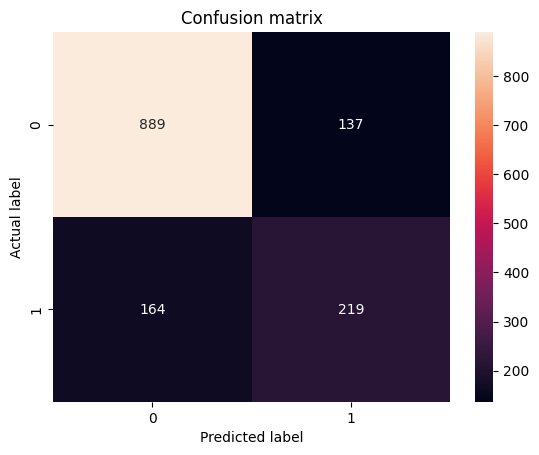

Neural network configuration: 2 hidden layers, 100 neurons per layer, learning rate 0.01
Training time: 3.72133207321167
Accuracy: 0.7494677075940384


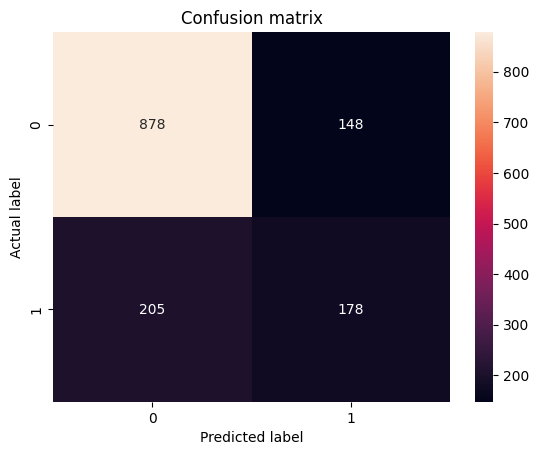

Neural network configuration: 10 hidden layers, 100 neurons per layer, learning rate 0.01
Training time: 14.408656120300293
Accuracy: 0.7508871540099361


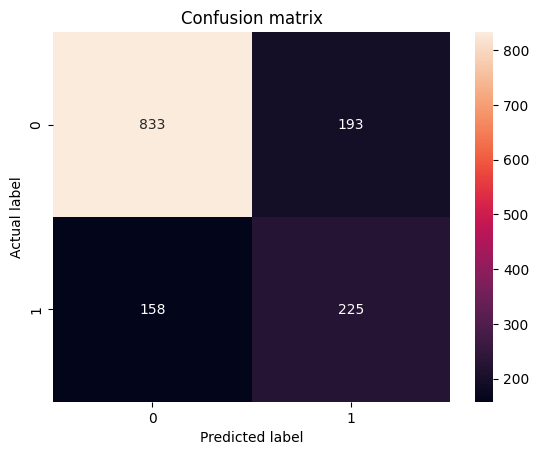

Neural network configuration: 2 hidden layers, 100 neurons per layer, learning rate 0.0001
Training time: 7.877753973007202
Accuracy: 0.7806955287437899


/Users/pontusdejounge/miniforge3/envs/test/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


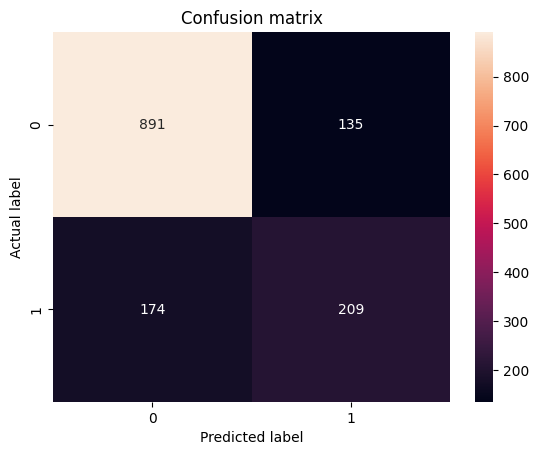

Neural network configuration: 2 hidden layers, 100 neurons per layer, learning rate 1e-05
Training time: 7.040786981582642
Accuracy: 0.7913413768630234


/Users/pontusdejounge/miniforge3/envs/test/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


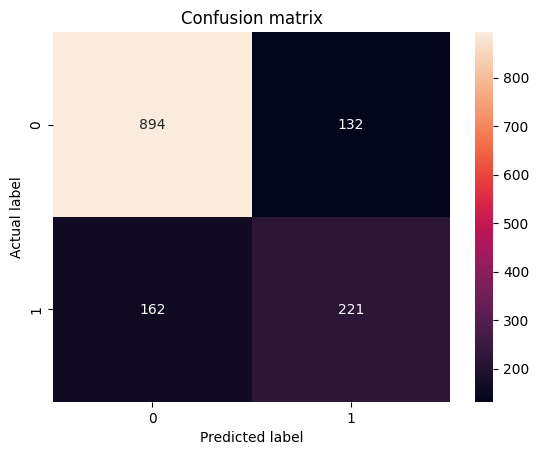

In [14]:
from sklearn.neural_network import MLPClassifier
import time
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def mlpClassifier(configs):
    for layers, neurons, learning_rate in configs:
        hidden_layer_sizes = tuple(neurons for _ in range(layers))
        clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate, random_state=42)
        
        start_time = time.time()
        clf.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time
        
        y_pred = clf.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Neural network configuration: {layers} hidden layers, {neurons} neurons per layer, learning rate {learning_rate}")
        print(f"Training time: {training_time}")
        print(f"Accuracy: {accuracy}")

        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt="d")
        plt.title("Confusion matrix")
        plt.ylabel("Actual label")
        plt.xlabel("Predicted label")
        plt.show()
mlpClassifier(configs)

# Nätverk 1

Matrisen visar att klassificeringsmodellen gjorde 889 korrekta positiva förutsägelser och 219 korrekta negativa förutsägelser. Modellen gjorde dock 137 felaktiga positiva förutsägelser och 164 felaktiga negativa förutsägelser. Det verkar som att modellen har svårigheter med att korrekt identifiera både positiva och negativa fall, vilket resulterar i ett märkbart antal falska positiva och falska negativa.

# Nätverk 2

Matrisen visar att klassificeringsmodellen gjorde 878 korrekta positiva förutsägelser och 178 korrekta negativa förutsägelser. Den gjorde dock 148 felaktiga positiva förutsägelser och 205 felaktiga negativa förutsägelser. Modellen har särskilt svårt att korrekt identifiera negativa fall, vilket resulterar i ett större antal falska negativa

# Nätverk 3

Matrisen visar att modellen gjorde 833 korrekta positiva förutsägelser och 225 korrekta negativa förutsägelser. Modellen gjorde dock 193 felaktiga positiva förutsägelser och 158 felaktiga negativa förutsägelser. Även i detta fall har modellen svårigheter med att korrekt identifiera både positiva och negativa fall, vilket resulterar i ett märkbart antal falska positiva och falska negativa.

# Nätverk 4

Matrisen visar att modellen gjorde 891 korrekta positiva förutsägelser och 209 korrekta negativa förutsägelser. Modellen gjorde dock 135 felaktiga positiva förutsägelser och 174 felaktiga negativa förutsägelser. Modellen har svårigheter med att korrekt identifiera både positiva och negativa fall, men särskilt negativa, vilket resulterar i fler falska negativa jämfört med falska positiva.

# Nätverk 5

Matrisen visar att modellen gjorde 894 korrekta positiva förutsägelser och 221 korrekta negativa förutsägelser. Modellen gjorde dock 132 felaktiga positiva förutsägelser och 162 felaktiga negativa förutsägelser. Även i detta fall har modellen svårigheter med att korrekt identifiera både positiva och negativa fall, vilket resulterar i ett antal falska positiva och falska negativa.

# För väl godkänt ska en modell med en accuracy som är över 80% skapas. Nu är det tillåtet att ändra på alla parametrar. Visa hur parametrarna har ställts in (inte bara ett nätverk med rätt parametrar).

In [15]:
configs = [
    (2, 100, 0.00001),
    (2, 200, 0.00001),
    (3, 100, 0.00001),
    (3, 200, 0.0001)
]


Neural network configuration: 2 hidden layers, 100 neurons per layer, learning rate 1e-05
Training time: 9.509551048278809
Accuracy: 0.7920511000709723


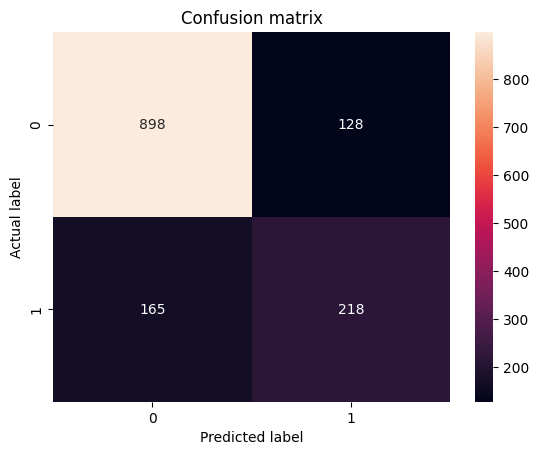

Neural network configuration: 2 hidden layers, 200 neurons per layer, learning rate 1e-05
Training time: 20.260899782180786
Accuracy: 0.7955997161107168


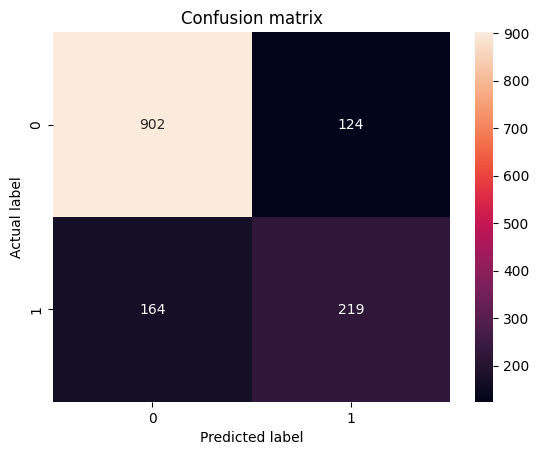

Neural network configuration: 3 hidden layers, 100 neurons per layer, learning rate 1e-05
Training time: 18.962398767471313
Accuracy: 0.8019872249822569


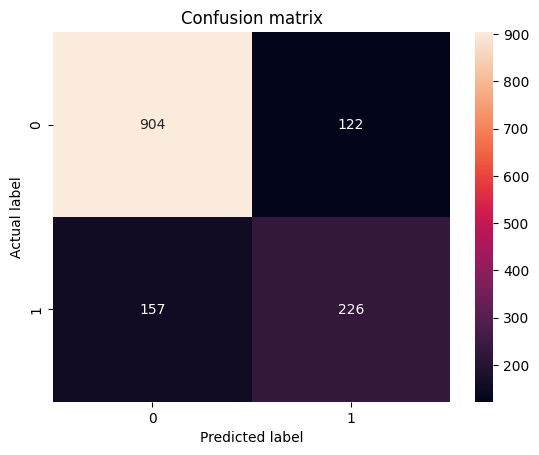

Neural network configuration: 3 hidden layers, 200 neurons per layer, learning rate 0.0001
Training time: 32.574777126312256
Accuracy: 0.751596877217885


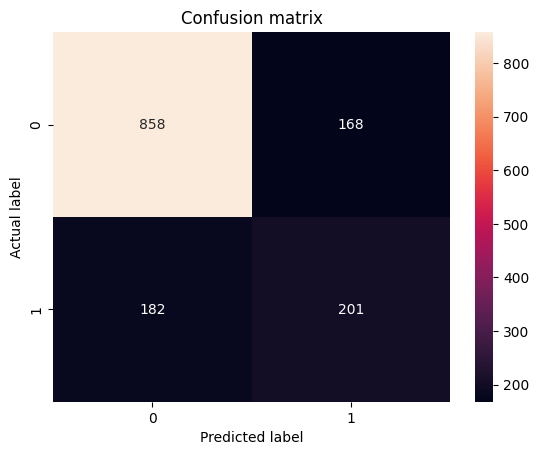

In [16]:
for layers, neurons, learning_rate in configs:
        hidden_layer_sizes = tuple(neurons for _ in range(layers))
        clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate, random_state=42, max_iter=2000)
        
        start_time = time.time()
        clf.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time
        
        y_pred = clf.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Neural network configuration: {layers} hidden layers, {neurons} neurons per layer, learning rate {learning_rate}")
        print(f"Training time: {training_time}")
        print(f"Accuracy: {accuracy}")

        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt="d")
        plt.title("Confusion matrix")
        plt.ylabel("Actual label")
        plt.xlabel("Predicted label")
        plt.show()